In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from time import time

SIR Model for 2 populations:

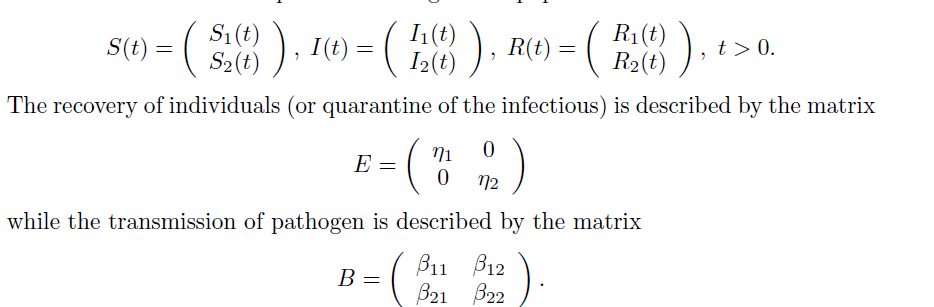
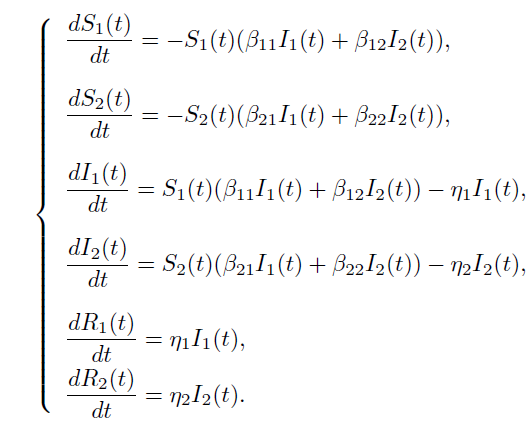

In [2]:
# Total population, N.
N1 = 1000
N2 = 1000
N = np.array([N1,N2])

# Initial number of infected and recovered individuals, I0 and R0.

#I0, R0 = 1, 0
S10, S20, I10, I20, R10, R20 = N1-1, N2-1, 1, 1, 0, 0      #First infected is in population 1

S0 = np.array([S10, S20])
I0 = np.array([I10, I20])
R0 = np.array([R10, R20])

# Initial conditions tuple
y0 = *S0, *I0, *R0

# Everyone else, S0, is susceptible to infection initially.
#S0 = N - I0 - R0
# Contact rate, beta, and mean recovery rate, gamma, (in 1/days).
#beta, gamma = 0.2, 1./10 
beta = np.array([[0.20,0.40],
                 [0.10,0.20]])

eta = np.array([[0.2, 0],
       [0, 0.2]])

# compute R_0
L = beta*np.linalg.inv(eta)     #next generation method
eigvals = np.linalg.eigvals(L)
print("vector(R_0) = ", eigvals)
print("R_0 = ", max(eigvals))

# A grid of time points (in days)
t = np.linspace(0, 100, 100)
u = 0

vector(R_0) =  [1. 1.]
R_0 =  1.0


In [3]:
run -i Skeleton.py

In [4]:
# Integrate the SIR equations over the time grid, t.
tic = time()

ret = odeint(deriv2pop, y0, t, args=(beta, eta))
S_1, S_2, I_1, I_2, R_1, R_2 = ret.T #.T gives transpose

ret2 = odeint(derivnpop, y0, t, args=(beta, eta))
y = ret2.T #.T gives transpose

toc = time()
print("time:", toc-tic)

time: 0.017012596130371094


In [5]:
print(S_1.shape)
print(t.shape)

(100,)
(100,)


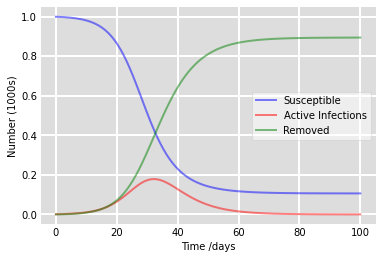

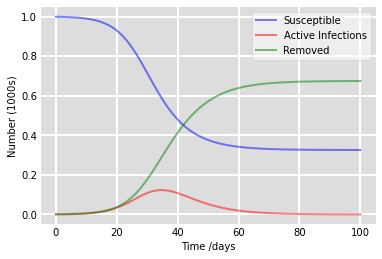

In [6]:
plot(S_1,I_1,R_1)
plot(S_2,I_2,R_2)

#plot(*y[::2])
#plot(*y[1::2])

<function matplotlib.pyplot.show(close=None, block=None)>

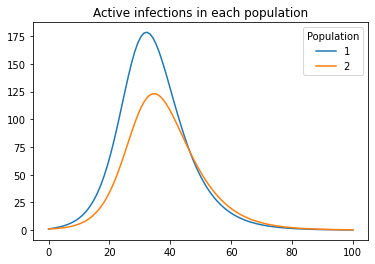

In [7]:
npop = int(len(y)/3)
pop = 1
for i in y[npop:2*npop]:
    plt.plot(t,i, label = str(pop))
    pop += 1
    
plt.title("Active infections in each population")
plt.legend(title = "Population")
plt.show